In [1]:
using PortAudio
using Plots
using SampledSignals

In [49]:
abstract type WaveForm end
struct Sine <: WaveForm end
struct SawTooth <: WaveForm end
struct Square <: WaveForm end

mutable struct Oscillator{WaveForm} <: SampleSource
    phase::Float64
    f::Float64
    fs::Float64
end

function output!(osc::Oscillator{Sine})
    osc.phase += (2 * π * osc.f) / osc.fs
    osc.phase = mod(osc.phase, 2 * π)
    return sin(osc.phase)
end

function output!(osc::Oscillator{SawTooth})
    osc.phase += (2 * π * osc.f) / osc.fs
    osc.phase = mod(osc.phase, 2 * π)
    return (osc.phase / π) - 1
end

function output!(osc::Oscillator{Square})
    osc.phase += (2 * π * osc.f) / osc.fs
    osc.phase = mod(osc.phase, 2 * π)
    return ((sin(osc.phase) > 0) - 0.5) * 2 
end

output! (generic function with 4 methods)

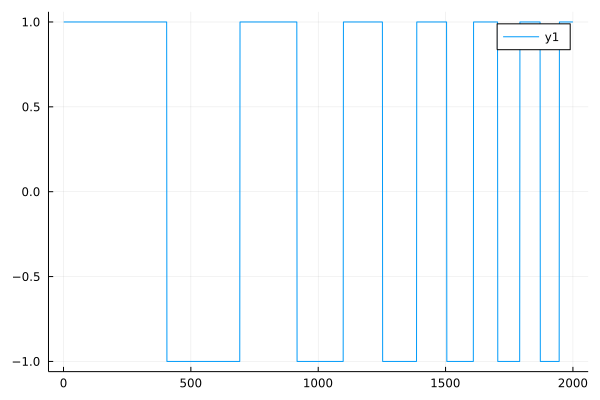

In [74]:
fs = 1000
t = 2
osc = Oscillator{Square}(0, 1, fs)
osc_out = []

for i = 1:t*fs
    osc.f *= 1 + (1 / (t * fs)) * 2 # Slowly increasing frequency until double the frequency at the end
    append!(osc_out, output!(osc))
end
plot(osc_out)

In [77]:
function SampledSignals.unsafe_read!(osc::Oscillator, buf::Array, frameoffset, framecount)
    buf[frameoffset+1:framecount] .= [output!(osc) * 0.01 for _ in 1:framecount]    
    return framecount
end

function Base.eltype(osc::Oscillator)
    return Float64
end

function SampledSignals.samplerate(osc::Oscillator)
    return osc.fs
end
function SampledSignals.nchannels(osc::Oscillator)
    return 1
end

In [78]:
src =  Oscillator{Square}(0, 440, 44100)

read(src, 2s)

88200-frame, 1-channel SampleBuf{Float64, 2}
2.0s sampled at 44100.0Hz
▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃

In [85]:
#PortAudioStream("External Headphones", 0, 2, frames_per_buffer=16) do stream
#    write(stream, src, 2s)
#end

2 s